# Analysis for the learning of the 2D dynamics with constant wind and the attack angle (alpha) as only state

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,7)

alphas = [-8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 19, 20]
n_alphas = len(alphas)
n_actions = 3

fs = 15
title_fs = 17
label_fs = 13
legend_fs = 11

## 1) Q matrix

In [34]:
cQ = pd.read_csv("cQ_matrix.txt")
#cQ3d = pd.read_csv("cQ_matrix3d.txt")
pQ = pd.read_csv("pQ_matrix.txt")

pQ.tail(4)

,episode,alpha_idx,action_0,action_1,action_2
7996,9980,12,296.626032,300.897988,311.609857
7997,9980,13,311.143876,311.609675,311.027309
7998,9980,14,311.752360,300.852501,294.703550
7999,9980,15,300.799043,289.792202,0.000000


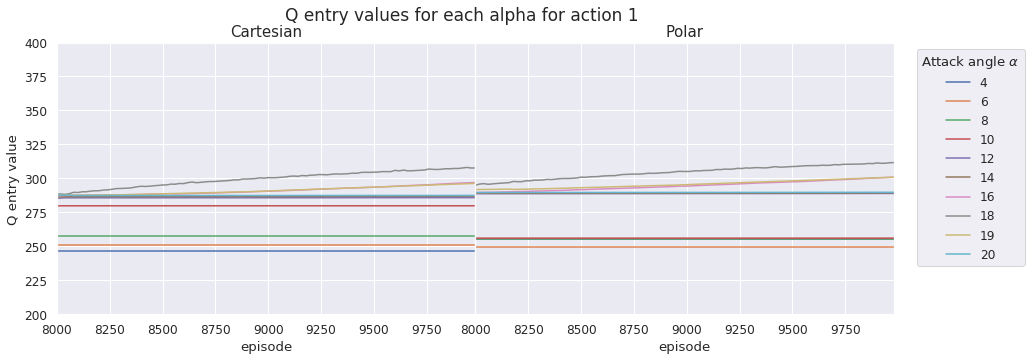

In [52]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

ep_max = cQ['episode'].max()
chosen_action = 1

for alph, val in enumerate(alphas):
    
    if (alph > 5):
    
        fig.suptitle("Q entry values for each alpha for action " + str(chosen_action), fontsize = title_fs)

        df = cQ.loc[cQ['alpha_idx'] == alph]
        axs[0].plot(df['episode'], df['action_'+str(chosen_action)], label = str(alphas[alph]))
        axs[0].grid(b=True)

        df = pQ.loc[pQ['alpha_idx'] == alph]
        axs[1].plot(df['episode'], df['action_'+str(chosen_action)],  label = str(alphas[alph]))
        axs[1].grid(b=True)

        plt.legend(title = 'Attack angle ' + r'$\alpha$', bbox_to_anchor=(1.04,1), loc="upper left")

        axs[0].set_ylabel('Q entry value')
        
        #axs[0].set_xlim(8000,ep_max)
        #axs[0].set_ylim(200,400)

        axs[0].set_title("Cartesian", fontsize = fs)
        axs[1].set_title("Polar", fontsize = fs)
    
for ax in axs.flat:
    ax.set(xlabel='episode')
    

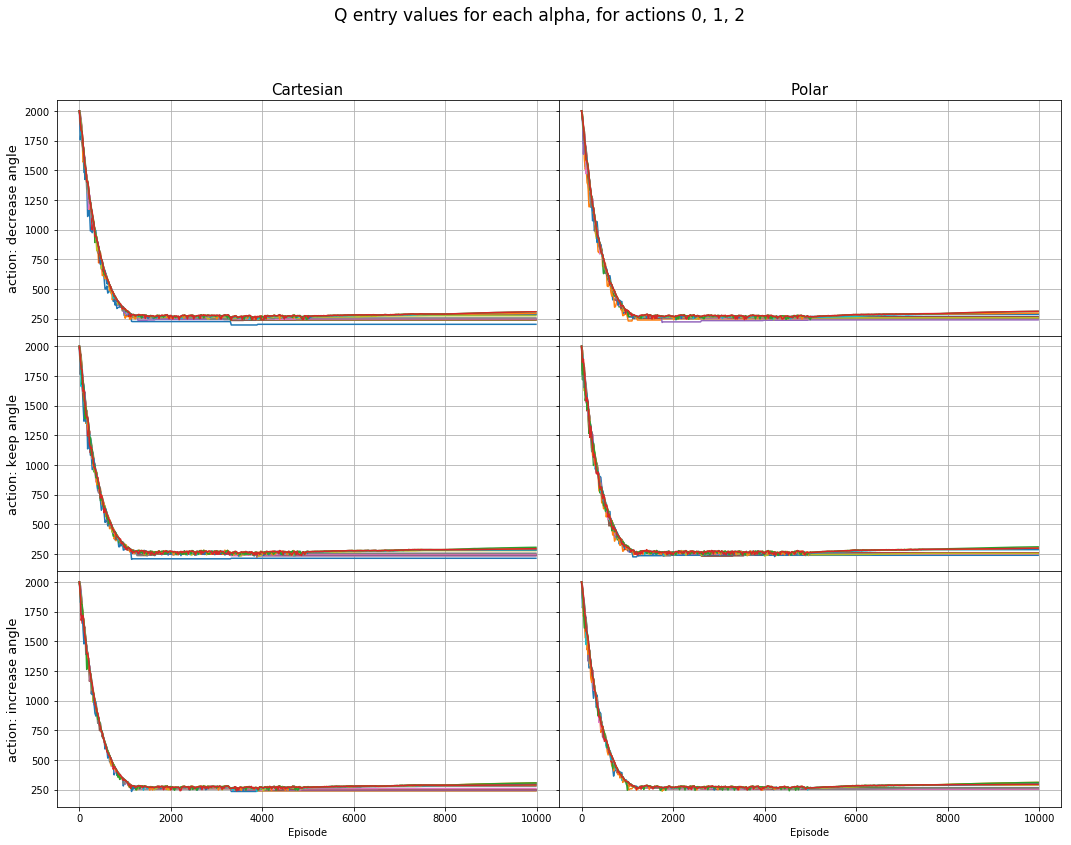

In [4]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(18, 13), gridspec_kw={'wspace': 0, 'hspace':0})
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axs
ep_max = cQ['episode'].max()

actions = ['action_0', 'action_1', 'action_2']

fig.suptitle("Q entry values for each alpha, for actions 0, 1, 2 ", fontsize = title_fs)

for alph in range(1,15):
    
    df = cQ.loc[cQ['alpha_idx'] == alph]

    ax1.plot(df['episode'], df['action_0'], label = str(alphas[alph]))
    ax3.plot(df['episode'], df['action_1'], label = str(alphas[alph]))
    ax5.plot(df['episode'], df['action_2'], label = str(alphas[alph]))
    
    ax1.set_ylabel('action: decrease angle', fontsize = label_fs)
    ax3.set_ylabel('action: keep angle', fontsize = label_fs)
    ax5.set_ylabel('action: increase angle', fontsize = label_fs)

    df = pQ.loc[pQ['alpha_idx'] == alph]
    
    ax2.plot(df['episode'], df['action_0'], label = str(alphas[alph]))
    ax4.plot(df['episode'], df['action_1'], label = str(alphas[alph]))
    ax6.plot(df['episode'], df['action_2'], label = str(alphas[alph]))

ax1.set_title("Cartesian", fontsize = fs)
ax2.set_title("Polar", fontsize = fs)
    
for ax in axs.flat:
    ax.set(xlabel='Episode')
    
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()

In [43]:
last_ep = cQ.episode.max()
cQ_last = cQ[cQ['episode'] == last_ep]
pQ_last = pQ[pQ['episode'] == last_ep]

cQ_last.head(2)

,episode,alpha_idx,action_0,action_1,action_2
7984,9980,0,0.000000,221.771754,250.987297
7985,9980,1,201.777969,215.170145,242.312608


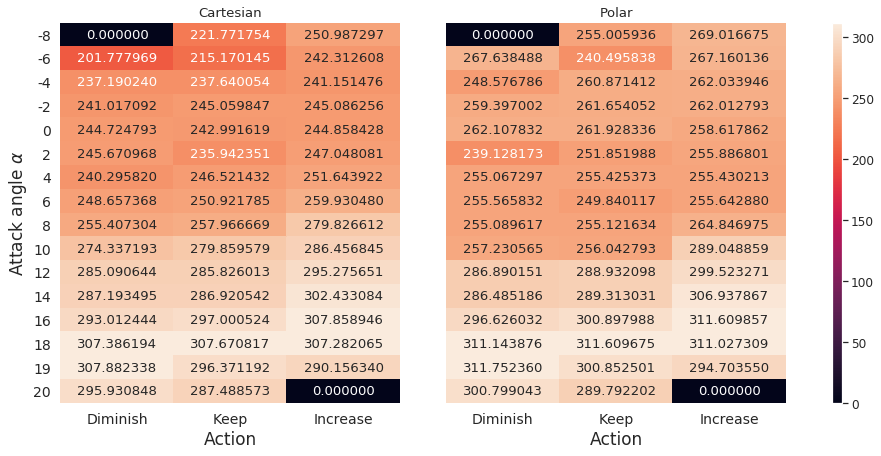

In [53]:
df1 = cQ_last[['action_0','action_1', 'action_2']]
df2 = pQ_last[['action_0','action_1', 'action_2']]

vmin = 0
vmax = max(df1['action_0'].max(), df2['action_0'].max(),
          df1['action_1'].max(), df2['action_1'].max(),
          df1['action_2'].max(), df2['action_2'].max())
#print(vmax)

fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[7,7,0.2]),figsize=(14, 7))
sns.set(font_scale=1.1)
sns.heatmap(df1, annot=True, fmt="f", cbar=False, ax=axs[0], vmin=vmin)
sns.heatmap(df2, annot=True, fmt="f", yticklabels=False, cbar=False, ax=axs[1], vmax=vmax)
axs[0].set_yticklabels(alphas)
axs[0].set_ylabel(r'Attack angle $\alpha$',fontsize=17)
axs[0].set_xlabel("Action",fontsize=17)
axs[1].set_xlabel("Action",fontsize=17)
axs[0].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[1].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[0].tick_params(labelsize=14)
axs[1].tick_params(labelsize=14)

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

fig.colorbar(axs[1].collections[0], cax=axs[2])

plt.show()

## 2) Rewards

In [5]:
crew = pd.read_csv("crewards.txt")
prew = pd.read_csv("prewards.txt")

crew.head(3)

,episode,epsilon,Alpha,steps,return
0,0,0.1,0.1,82201,31.575883
1,1,0.1,0.1,87735,16.249814
2,2,0.1,0.1,2000001,26.770555


In [6]:
crew.Alpha.ne(0.001).idxmax() == prew.Alpha.ne(0.001).idxmax()

True

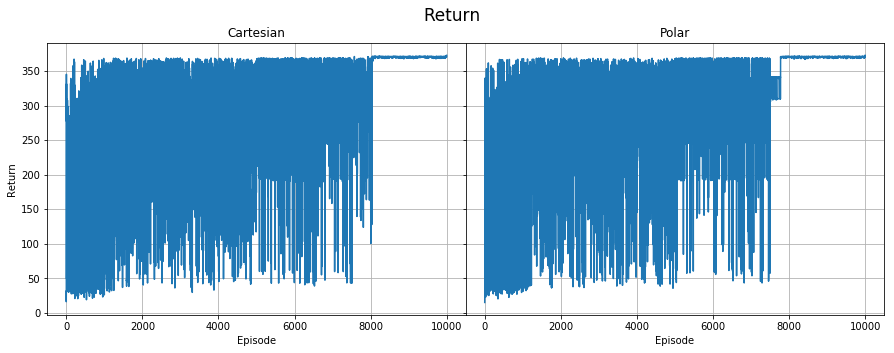

In [7]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

fig.suptitle("Return", fontsize = title_fs)

axs[0].plot(crew['episode'], crew['return'])
axs[0].grid(b=True)

axs[1].plot(prew['episode'], prew['return'])
axs[1].grid(b=True)

#axs[0].legend(title = r'Wind (m/s)', fontsize = legend_fs, loc='upper left', prop={"size":9})
axs[0].set_ylabel('Return')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Episode')

## Mean growth of returns

In [8]:
num_blocks = 40
data_per_block = int(len(crew)/num_blocks)

cmean = []
pmean = []
for i in range(0,num_blocks):
    #print(i*n_data,i*n_data+n_data)
    cmean.append(np.mean(crew['return'][i*data_per_block:i*data_per_block+data_per_block]))
    pmean.append(np.mean(prew['return'][i*data_per_block:i*data_per_block+data_per_block]))

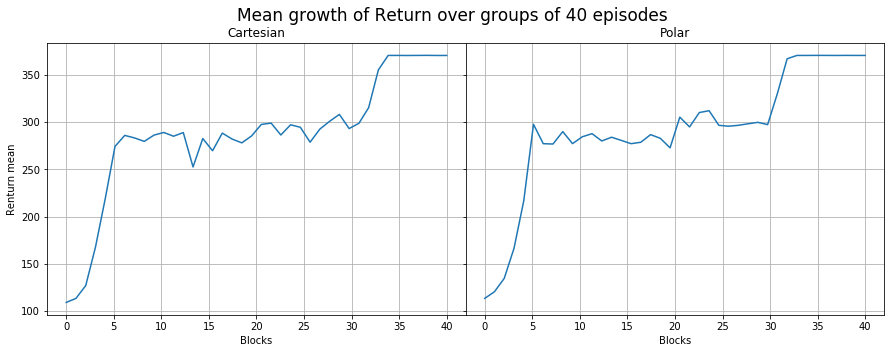

In [9]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

fig.suptitle('Mean growth of Return over groups of ' + str(num_blocks) + ' episodes', fontsize = title_fs)

axs[0].plot(np.linspace(0, num_blocks, num_blocks), cmean)
axs[0].grid(b=True)

axs[1].plot(np.linspace(0, num_blocks, num_blocks), pmean)
axs[1].grid(b=True)

axs[0].set_ylabel('Renturn mean')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Blocks')

## 3) Last iteration Policy

In [10]:
cpol = pd.read_csv("cpolicy.txt")
ppol = pd.read_csv("ppolicy.txt")

cpol.head(3)

,step,alpha,action,reward,Q[s+0],Q[s+1],Q[s+2]
0,0,12.0,2,0.000000,285.090644,285.826013,295.404395
1,1000,14.0,2,0.163829,287.193495,286.920542,302.545292
2,2000,16.0,2,0.576593,293.070062,297.122369,307.985108


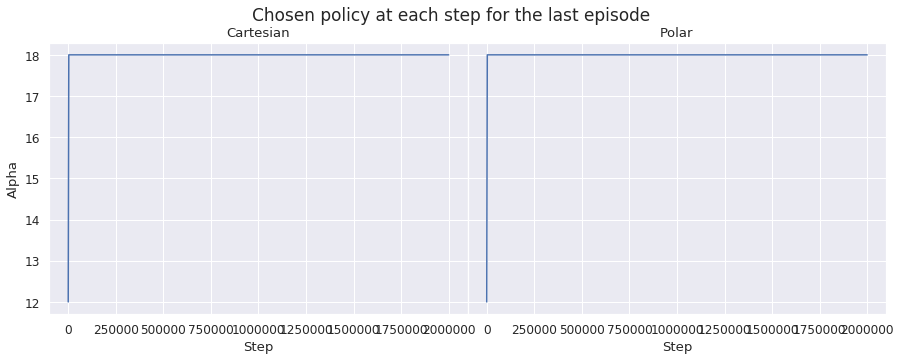

In [70]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

fig.suptitle('Chosen policy at each step for the last episode ', fontsize = title_fs)

axs[0].plot(cpol['step'], cpol['alpha'])
axs[0].grid(b=True)

axs[1].plot(ppol['step'], ppol['alpha'])
axs[1].grid(b=True)

axs[0].set_ylabel('Alpha')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Step')

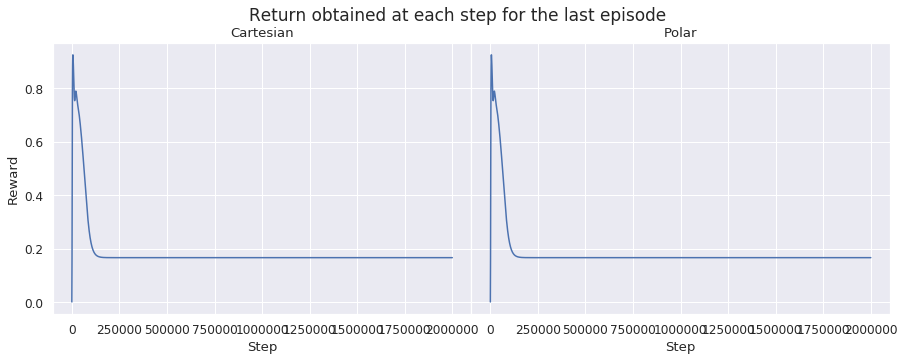

In [71]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

fig.suptitle('Return obtained at each step for the last episode', fontsize = title_fs)

axs[0].plot(cpol['step'], cpol['reward'])
axs[0].grid(b=True)

axs[1].plot(ppol['step'], ppol['reward'])
axs[1].grid(b=True)

axs[0].set_ylabel('Reward')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Step')

## 4) last episode dynamics plot

In [12]:
cout = pd.read_csv("cout.txt")
pout = pd.read_csv("pout.txt")

cout.head(3)

,t,x_kite,z_kite,x_block,z_block,theta,vtheta,windx,windy,v_block,Tension
0,0,35.355336,35.355343,0.000000,0.0,0.785398,0.000334,10.0,0.0,0.000250,209.436399
1,1000,34.579939,36.168572,0.056985,0.0,0.808625,0.484972,10.0,0.0,1.641502,2807.287869
2,2000,32.985690,37.957222,0.439580,0.0,0.861949,0.528296,10.0,0.0,5.768967,3043.661974


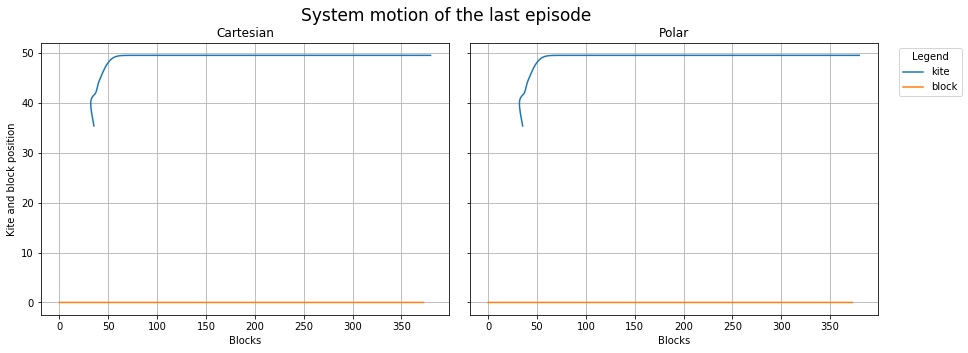

In [13]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0.05})

fig.suptitle('System motion of the last episode', fontsize = title_fs)

axs[0].plot(cout['x_kite'], cout['z_kite'],label='kite')
axs[0].plot(cout['x_block'], cout['z_block'],label='block')
axs[0].grid(b=True)

axs[1].plot(pout['x_kite'], pout['z_kite'],label='kite')
axs[1].plot(pout['x_block'], pout['z_block'],label='block')
axs[1].grid(b=True)

plt.legend(title = 'Legend', bbox_to_anchor=(1.04,1), loc="upper left")
        
axs[0].set_ylabel('Kite and block position')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Blocks')
#fig.savefig('prova.png', dpi=400)

## 6) Q matrix counter

In [14]:
cQ_count = pd.read_csv("cQ_counter.txt")
pQ_count = pd.read_csv("pQ_counter.txt")

pQ_count.head(5)

,episode,alpha_idx,action_0,action_1,action_2
0,9999,0,0,12779,4839
1,9999,1,4875,5271,1932
2,9999,2,2014,5103,7183
3,9999,3,7300,22769,19550
4,9999,4,19710,44788,25712


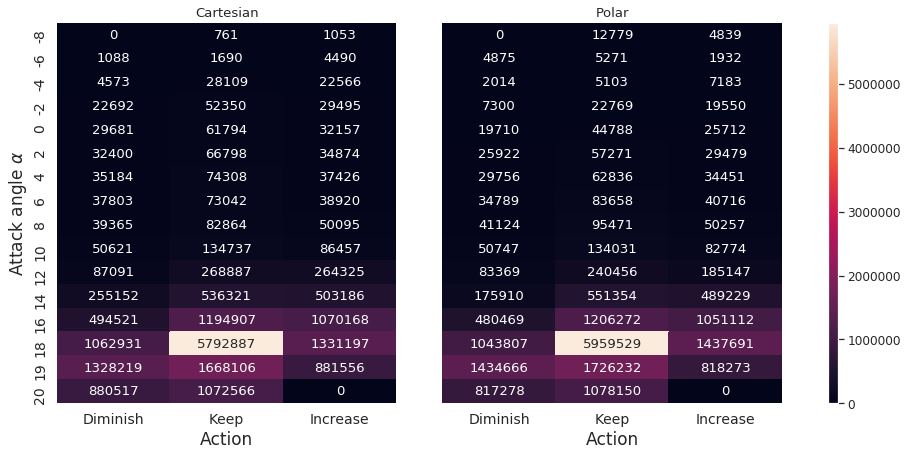

In [54]:
df1 = cQ_count[['action_0','action_1', 'action_2']]
df2 = pQ_count[['action_0','action_1', 'action_2']]

vmin = 0
vmax = max(df1['action_0'].max(), df2['action_0'].max(),
          df1['action_1'].max(), df2['action_1'].max(),
          df1['action_2'].max(), df2['action_2'].max())
#print(vmax)

fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[7,7,0.2]),figsize=(14, 7))
sns.set(font_scale=1.1)
sns.heatmap(df1, annot=True, fmt="d", cbar=False, ax=axs[0], vmin=vmin)
sns.heatmap(df2, annot=True, fmt="d", yticklabels=False, cbar=False, ax=axs[1], vmax=vmax)
axs[0].set_yticklabels(alphas)
axs[0].set_ylabel(r'Attack angle $\alpha$',fontsize=17)
axs[0].set_xlabel("Action",fontsize=17)
axs[1].set_xlabel("Action",fontsize=17)
axs[0].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[1].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[0].tick_params(labelsize=14)
axs[1].tick_params(labelsize=14)

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

fig.colorbar(axs[1].collections[0], cax=axs[2])

plt.show()
#fig = plt.get_figure()
#fig.savefig('heatmap.png', dpi=400)